<a href="https://colab.research.google.com/github/Igli333/data-science/blob/main/Lab_2_DS_Igli_Balla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

boston_housing = pd.read_csv('data/boston_housing.csv')
boston_housing = boston_housing.drop(columns=['Unnamed: 0'])

boston_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


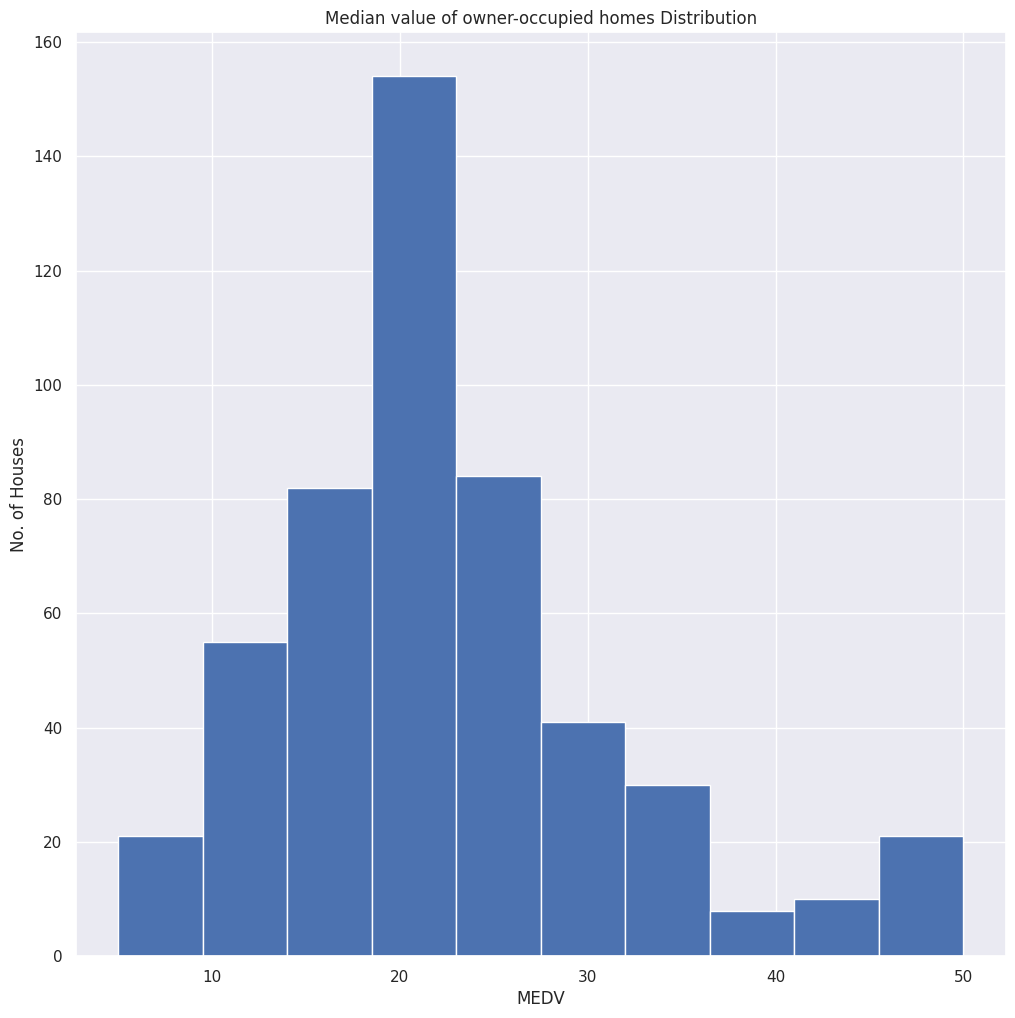

In [ ]:
boston_housing['MEDV'].plot(kind='hist', title='Median value of owner-occupied homes Distribution')
plt.xlabel('MEDV')
plt.ylabel('No. of Houses')
plt.show()

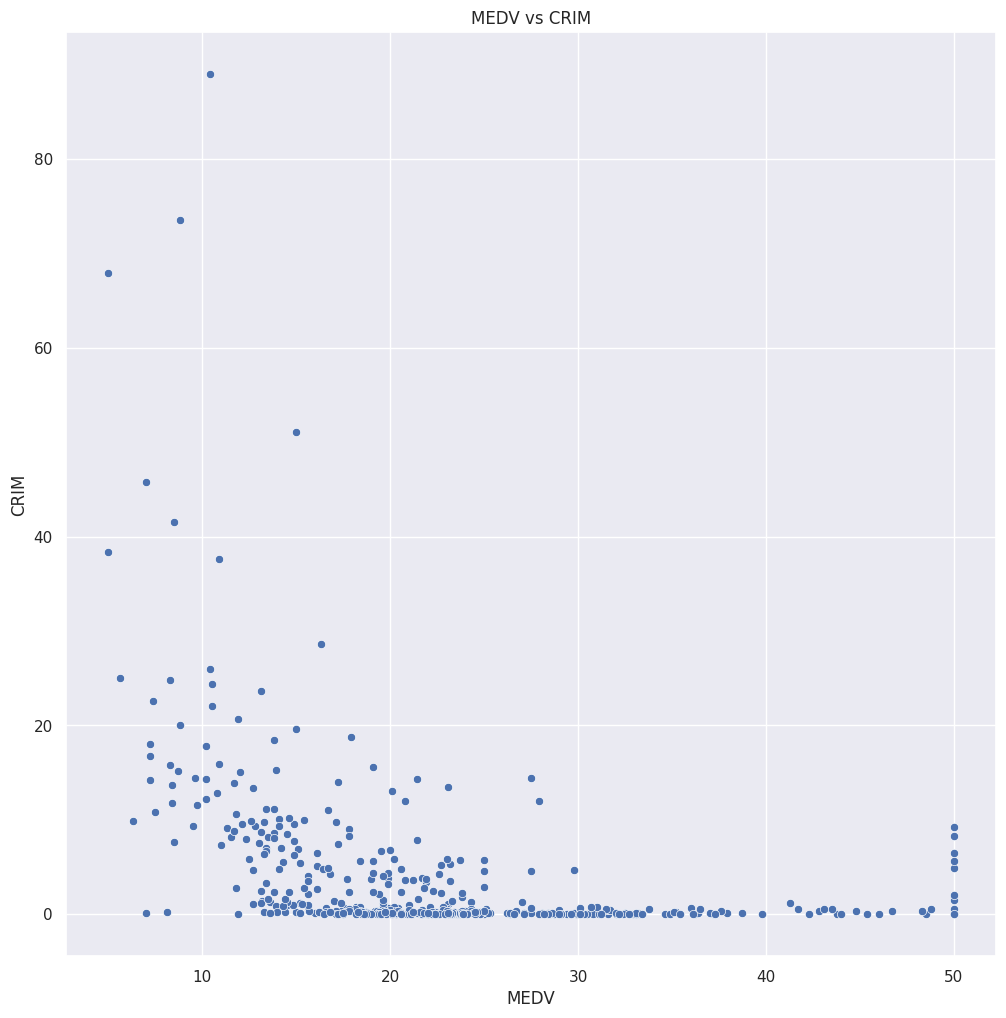

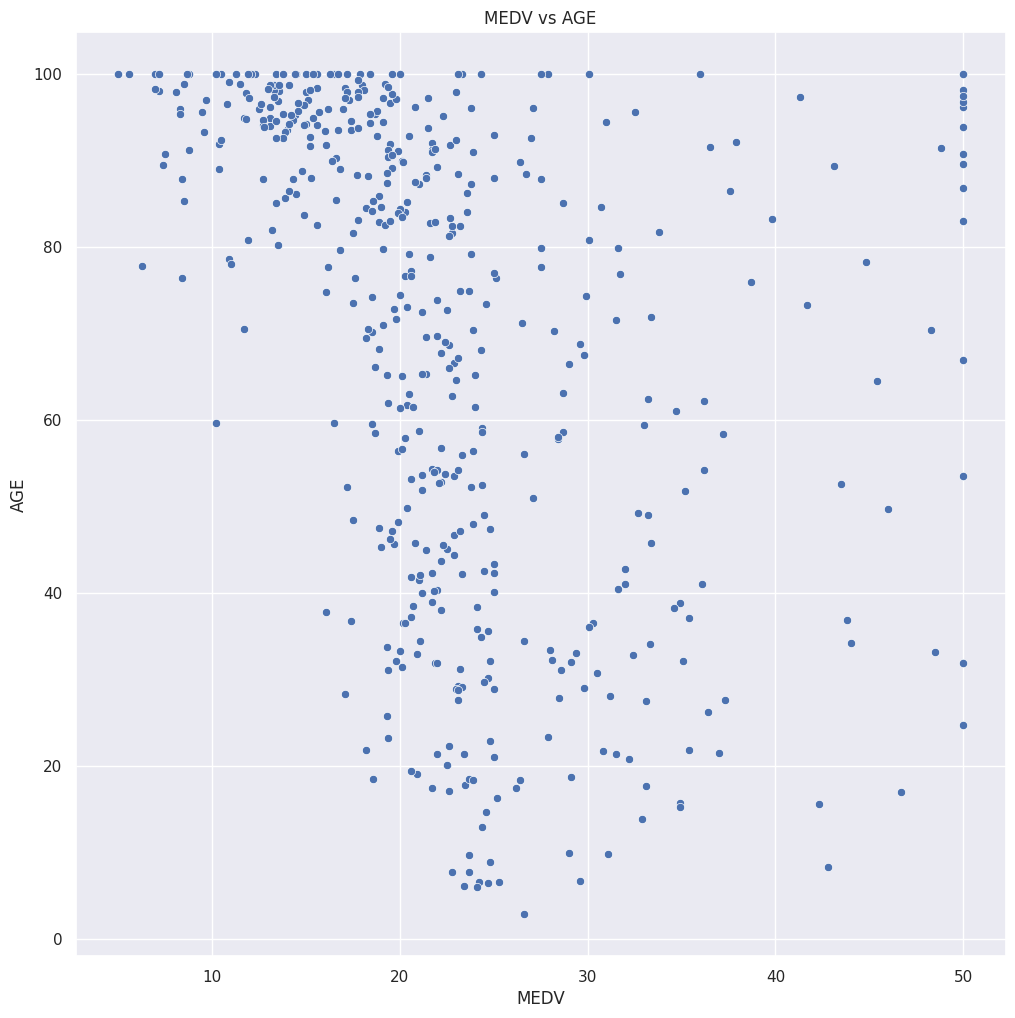

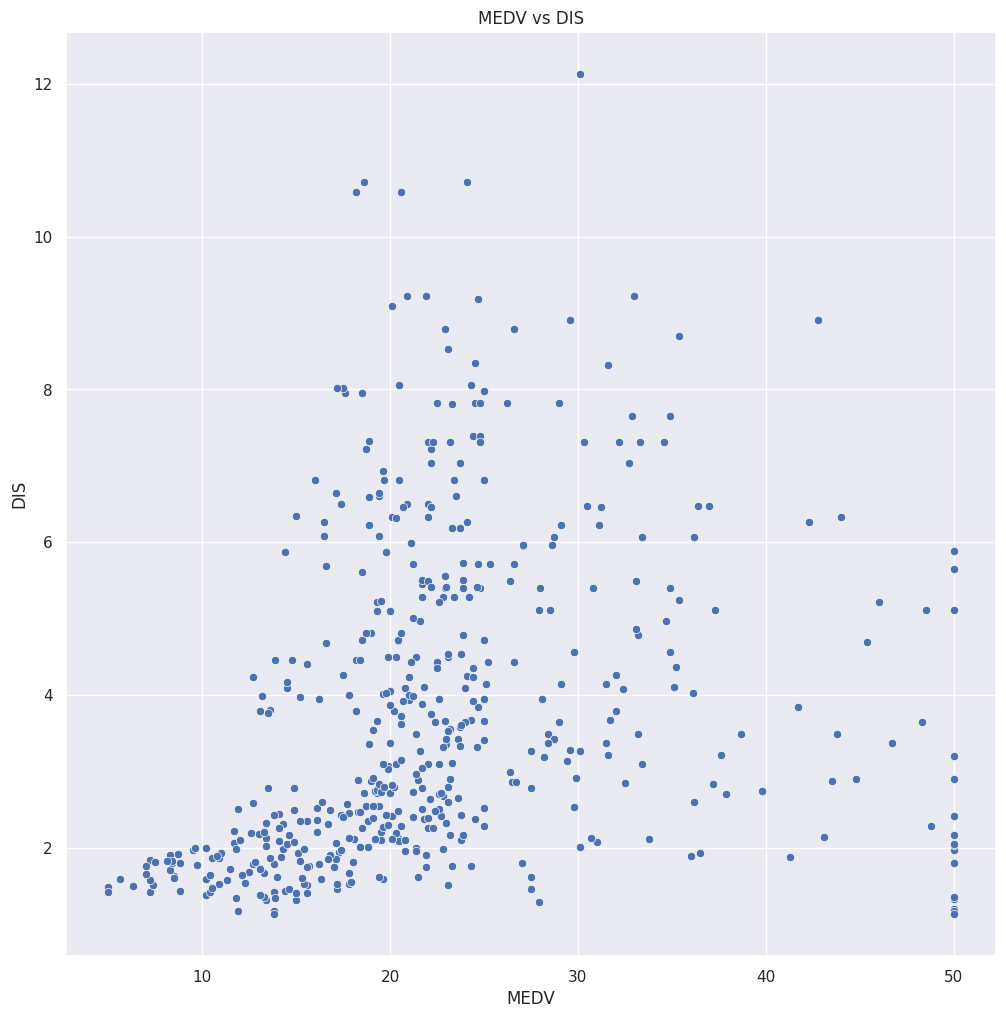

In [ ]:
sns.scatterplot(x='MEDV', y='CRIM',data=boston_housing)
plt.title('MEDV vs CRIM')
plt.show()

sns.scatterplot(x='MEDV', y='AGE',data=boston_housing)
plt.title('MEDV vs AGE')
plt.show()

sns.scatterplot(x='MEDV', y='DIS',data=boston_housing)
plt.title('MEDV vs DIS')
plt.show()

In [ ]:
for column in boston_housing.columns.tolist():
    zero_count = boston_housing[column].value_counts().get(0, 0)
    if zero_count/506 > 0.75:
        boston_housing = boston_housing.drop(columns=[column])

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']


<Axes: >

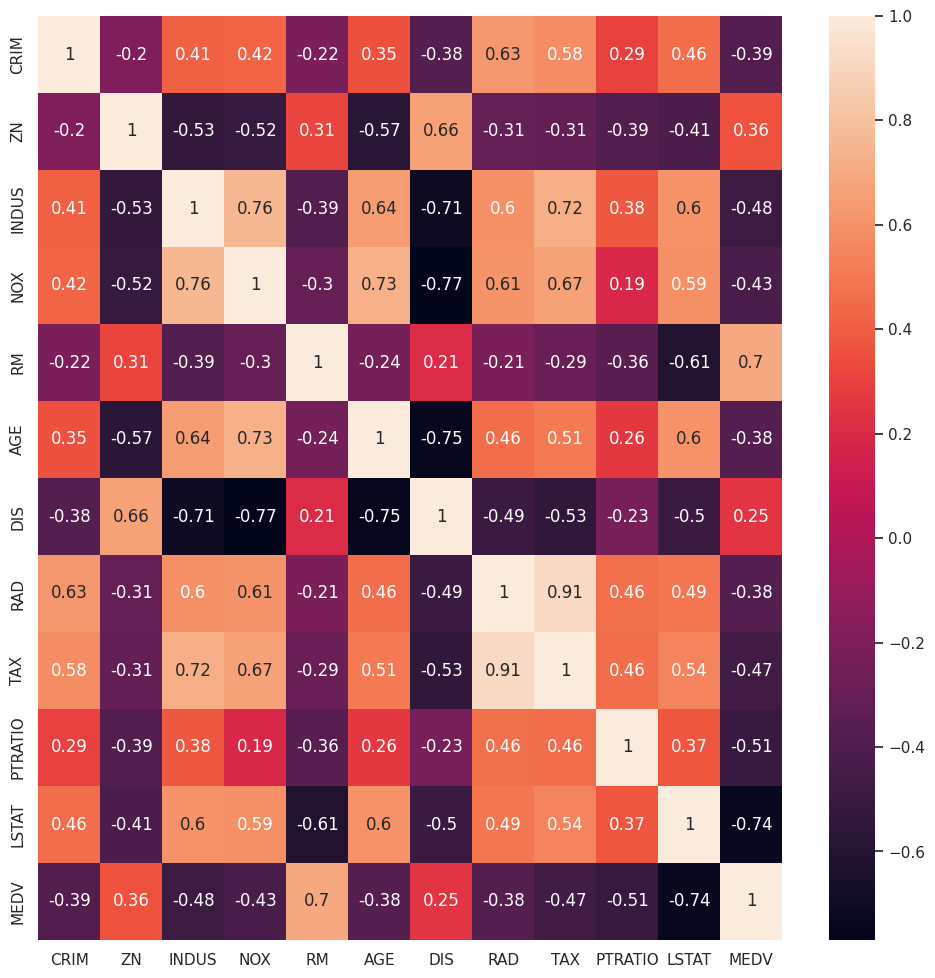

In [ ]:
corr = boston_housing.corr(numeric_only=True)

sns.set_theme(rc={'figure.figsize':(12,12)})
sns.heatmap(corr, annot=True)

In [ ]:
boston_housing = boston_housing.drop(['LSTAT', 'RAD', 'INDUS', 'TAX', 'NOX'], axis=1)

<Axes: >

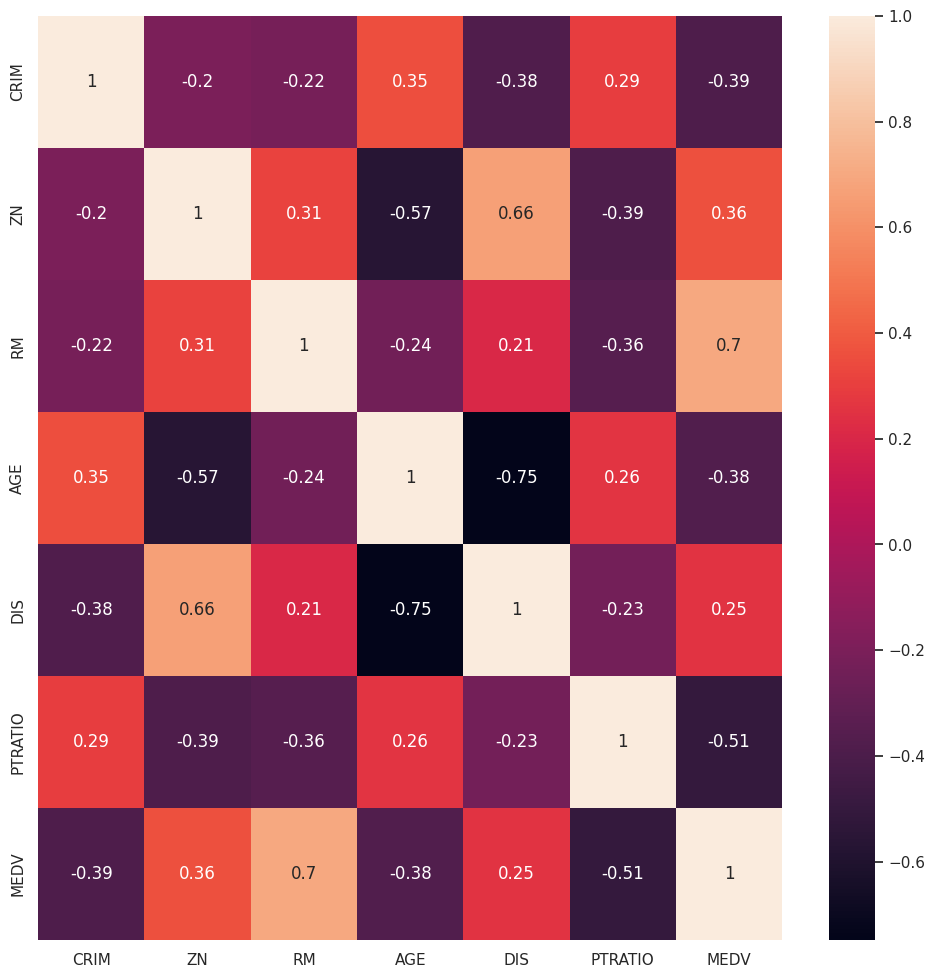

In [ ]:
corr = boston_housing.corr(numeric_only=True)

sns.set_theme(rc={'figure.figsize':(12,12)})
sns.heatmap(corr, annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

X = boston_housing.drop(['MEDV'], axis=1)
y = boston_housing['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

SVR Mean Squared Error: 40.00918956769766
SVR Mean Absolute Error: 3.5839733866859533
SVR Root Mean Squared Error: 6.325281777731144


<Axes: xlabel='MEDV'>

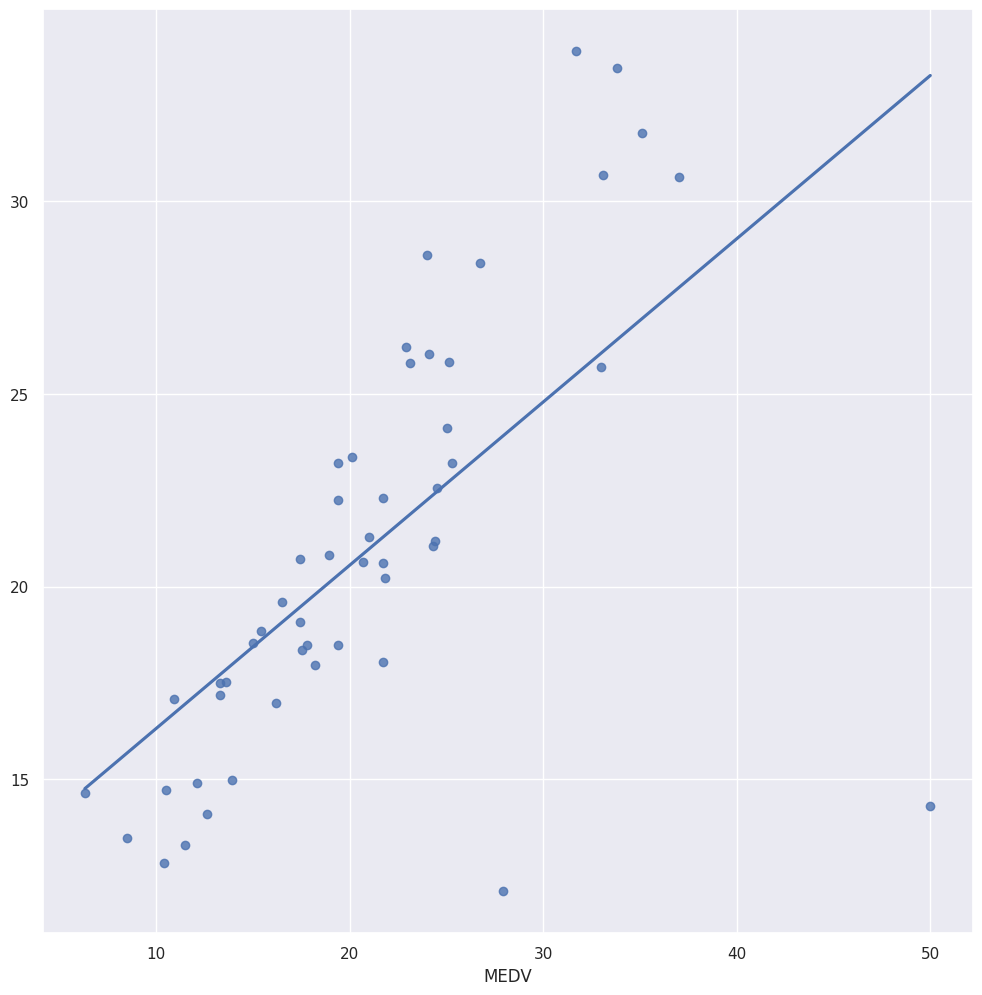

In [ ]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = root_mean_squared_error(y_test, y_pred_svr)

print(f'SVR Mean Squared Error: {mse_svr}')
print(f'SVR Mean Absolute Error: {mae_svr}')
print(f'SVR Root Mean Squared Error: {rmse_svr}')

sns.regplot(x=y_test, y=y_pred_svr, ci=None)

kNN Mean Squared Error: 38.91989106753812
kNN Mean Absolute Error: 3.4307189542483663
kNN Root Mean Squared Error: 6.238580853650782


<Axes: xlabel='MEDV'>

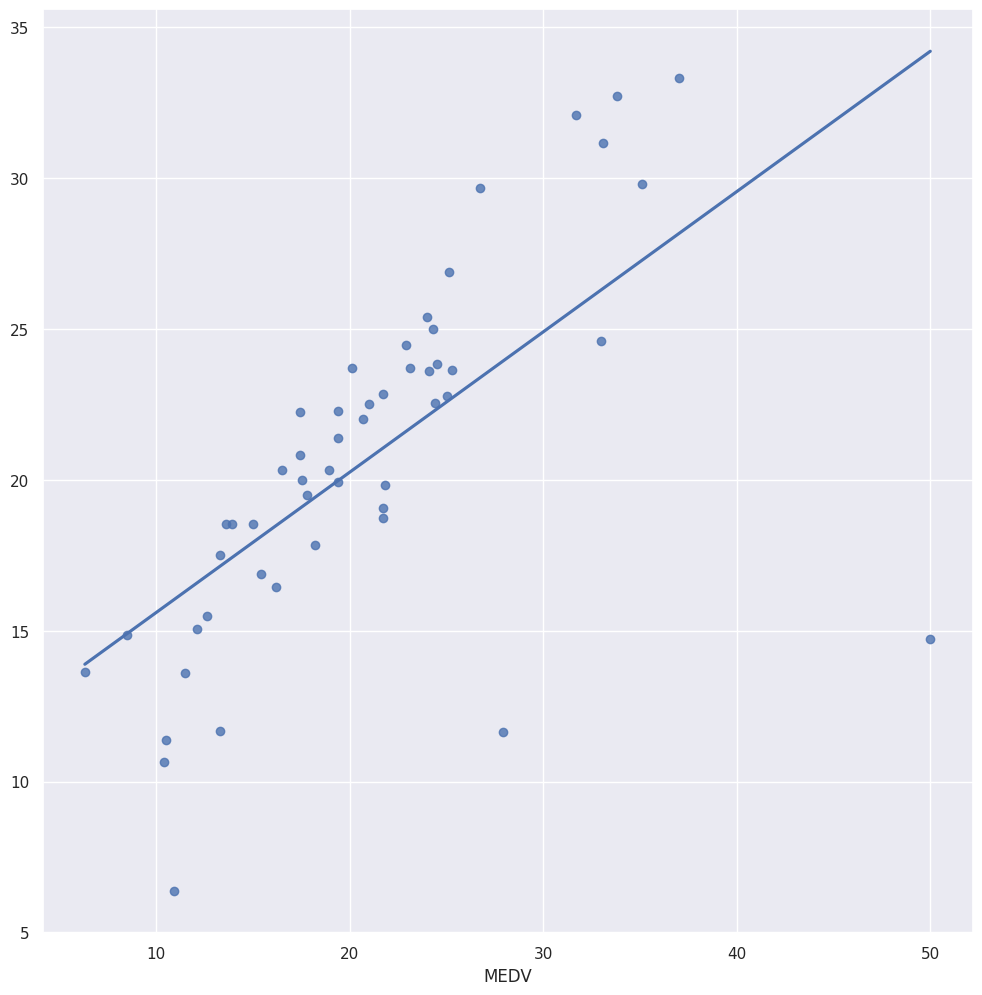

In [ ]:
knn_boston_housing = KNeighborsRegressor(n_neighbors=3)
knn_boston_housing.fit(X_train, y_train)

y_pred_knn = knn_boston_housing.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = root_mean_squared_error(y_test, y_pred_knn)
print('Mean Squared Error: ', mse_knn)
print('Mean Absolute Error: ', mse_knn)
print('Root Mean Squared Error: ', mse_knn)

sns.regplot(x=y_test, y=y_pred_knn, ci=None)